In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import mysql.connector

db=mysql.connector.connect(host='localhost',
                                                           user='root',
                                                           password='Neelakanta@MySQL',
                                                           database='ecommerce')

cur=db.cursor()

## List all unique cities where customers are located

In [36]:
query=" select distinct customer_city from customers "

cur.execute(query)

data=cur.fetchall()
df=pd.DataFrame(data)
df

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
...,...
4114,siriji
4115,natividade da serra
4116,monte bonito
4117,sao rafael


## Count number of orders placed in 2017

In [4]:
query=" select count(order_id) from orders where year(order_purchase_timestamp)=2017 "

cur.execute(query)

data=cur.fetchall()
print('Total orders placed in 2017: ',data[0][0])

Total orders placed in 2017:  45101


## Find total sales per category

In [5]:
query=""" select products.product_category category,
 round(sum(payments.payment_value),2) sales
 from products join order_items
 on products.product_id=order_items.product_id
 join payments
 on payments.order_id=order_items.order_id
 group by category
 """

cur.execute(query)

data=cur.fetchall()
df=pd.DataFrame(data,columns=['Category','Sales'])
df

,Category,Sales
0,perfumery,506738.66
1,Furniture Decoration,1430176.39
2,telephony,486882.05
3,bed table bath,1712553.67
4,automotive,852294.33
...,...,...
69,cds music dvds,1199.43
70,La Cuisine,2913.53
71,Fashion Children's Clothing,785.67
72,PC Gamer,2174.43


## Calculate percentage of orders that were paid in installments

In [6]:
query=" select (sum(case when payment_installments>1 then 1 else 0 end))/count(*)*100 from payments "

cur.execute(query)

data=cur.fetchall()
print('The percentage of orders that were paid in installments: ',data[0][0],'%')

The percentage of orders that were paid in installments:  49.4176 %


## Count number of customers from each state

In [7]:
query=" select customer_state, count(customer_id) as Total_customers from customers group by customer_state "

cur.execute(query)

data=cur.fetchall()
df=pd.DataFrame(data,columns=['State','No.of Customers'])
print(df)

   State  No.of Customers
0     SP            41746
1     SC             3637
2     MG            11635
3     PR             5045
4     RJ            12852
5     RS             5466
6     PA              975
7     GO             2020
8     ES             2033
9     BA             3380
10    MA              747
11    MS              715
12    CE             1336
13    DF             2140
14    RN              485
15    PE             1652
16    MT              907
17    AM              148
18    AP               68
19    AL              413
20    RO              253
21    PB              536
22    TO              280
23    PI              495
24    AC               81
25    SE              350
26    RR               46


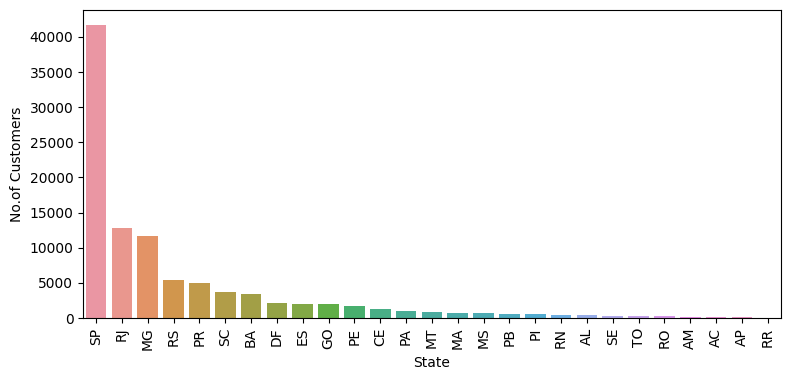

In [8]:
df=df.sort_values(by='No.of Customers',ascending=False)
plt.figure(figsize=(9,4))
sns.barplot(x=df['State'],y=df['No.of Customers'],data=df)
plt.xticks(rotation=90)
plt.show()

## Calculate orders per month in year 2018

In [9]:
query=" select monthname(order_purchase_timestamp) as month, count(order_id) as total_orders from orders where year(order_purchase_timestamp)=2018 group by month "

cur.execute(query)

data=cur.fetchall()
df=pd.DataFrame(data,columns=['month','total_orders'])
df

,month,total_orders
0,July,6292
1,August,6512
2,February,6728
3,June,6167
4,March,7211
5,January,7269
6,May,6873
7,April,6939
8,September,16
9,October,4


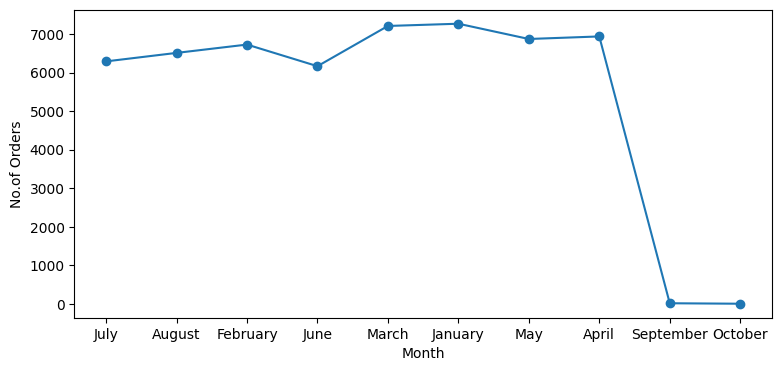

In [10]:
plt.figure(figsize=(9,4))
plt.plot(df['month'],df['total_orders'],marker='o')
plt.xlabel('Month')
plt.ylabel('No.of Orders')
plt.show()

## Find the average number of products per order group by customer city

In [11]:
query=""" with count_per_order as (select orders.order_id, orders.customer_id, count(order_items.order_id) as oc 
                                          from orders join order_items
                                          on orders.order_id=order_items.order_id
                                          group by orders.order_id,orders.customer_id)
                                          select customers.customer_city,round(avg(count_per_order.oc),2) as average_orders
                                          from customers join count_per_order
                                          on customers.customer_id=count_per_order.customer_id
                                          group by customer_city
                                           """

cur.execute(query)

data=cur.fetchall()
df=pd.DataFrame(data,columns=['customer_city','average_orders'])
df

,customer_city,average_orders
0,sao paulo,1.16
1,sao jose dos campos,1.14
2,porto alegre,1.17
3,indaial,1.12
4,treze tilias,1.27
...,...,...
4105,japaratuba,1.00
4106,sebastiao leal,1.00
4107,buriti,3.00
4108,morro agudo de goias,1.00


In [12]:
df=df.sort_values(by='average_orders',ascending=False)
df

,customer_city,average_orders
3574,padre carvalho,7.00
1255,celso ramos,6.50
3120,datas,6.00
3717,candido godoi,6.00
3863,matias olimpio,5.00
...,...,...
2188,prados,1.00
2189,bocaiuva do sul,1.00
2190,arataca,1.00
2191,abelardo luz,1.00


## Calculate percentage of revenue contributed by each product category

In [13]:
query=""" select products.product_category category,
 round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales
 from products join order_items
 on products.product_id=order_items.product_id
 join payments
 on payments.order_id=order_items.order_id
 group by category order by sales desc
 """

cur.execute(query)

data=cur.fetchall()
df=pd.DataFrame(data,columns=['product_category','revenue_percentage'])
df

,product_category,revenue_percentage
0,bed table bath,10.70
1,HEALTH BEAUTY,10.35
2,computer accessories,9.90
3,Furniture Decoration,8.93
4,Watches present,8.93
...,...,...
69,House Comfort 2,0.01
70,cds music dvds,0.01
71,PC Gamer,0.01
72,Fashion Children's Clothing,0.00


## Identify the correlation between product price and number of times product has been purchased

In [14]:
query="""select products.product_category,
                                         count(order_items.product_id),
                                         round(avg(order_items.price),2)
                                         from products join order_items
                                         on products.product_id=order_items.product_id
                                         group by products.product_category"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['category','order_count','price'])
df

,category,order_count,price
0,HEALTH BEAUTY,9670,130.16
1,sport leisure,8641,114.34
2,Cool Stuff,3796,167.36
3,computer accessories,7827,116.51
4,Watches present,5991,201.14
...,...,...,...
69,flowers,33,33.64
70,Kitchen portable and food coach,15,264.57
71,House Comfort 2,30,25.34
72,CITTE AND UPHACK FURNITURE,38,114.95


In [15]:
import numpy as np
arr1=df['order_count']
arr2=df['price']
np.corrcoef(arr1,arr2)

array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

## Calculate the total revenue of each seller and rank them based on revenue

In [16]:
query="""select *, dense_rank() over(order by revenue desc) 
                                         from (select order_items.seller_id,
                                         sum(payments.payment_value) revenue
                                         from order_items join payments
                                         on order_items.order_id=payments.order_id
                                         group by order_items.seller_id
                                         order by revenue desc) as a"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['seller_id','total_revenue','ranking'])
df

,seller_id,total_revenue,ranking
0,7c67e1448b00f6e969d365cea6b010ab,507166.907302,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.039840,2
2,4a3ca9315b744ce9f8e9374361493884,301245.269765,3
3,1f50f920176fa81dab994f9023523100,290253.420128,4
4,53243585a1d6dc2643021fd1853d8905,284903.080498,5
...,...,...,...
3090,ad14615bdd492b01b0d97922e87cb87f,19.209999,3082
3091,702835e4b785b67a084280efca355756,18.559999,3083
3092,4965a7002cca77301c82d3f91b82e1a9,16.360001,3084
3093,77128dec4bec4878c37ab7d6169d6f26,15.220000,3085


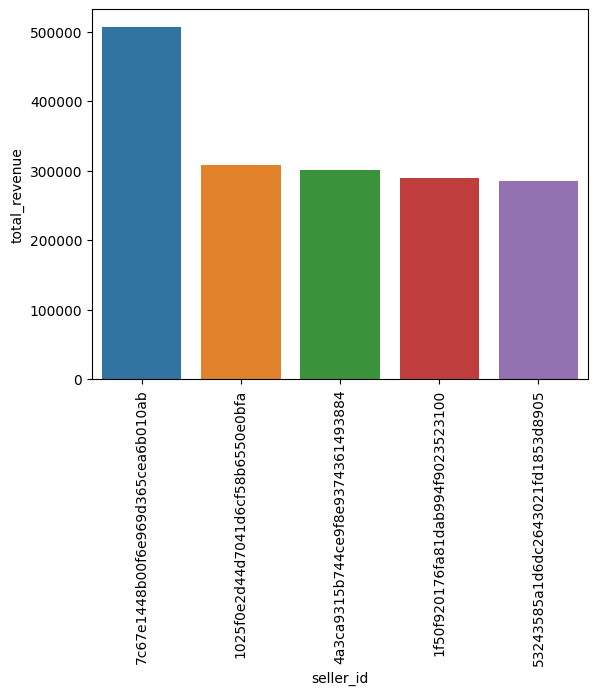

In [17]:
sns.barplot(x=df['seller_id'].head(),y=df['total_revenue'].head(),data=df.head())
plt.xticks(rotation=90)
plt.show()

## Calculate the moving average of order values for each customer over their order history

In [18]:
query="""select customer_id, order_purchase_timestamp,
avg(payment) over(partition by customer_id order by order_purchase_timestamp rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp,
payments.payment_value as payment
from orders join payments
on orders.order_id=payments.order_id) as a
"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['customer_id','order_purchase_timestamp','moving_average'])
df

,customer_id,order_purchase_timestamp,moving_average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.010002
...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.500000


## Calculate cumulative sales per each month for every year

In [19]:
query="""select year, month, sales,
                                         sum(sales) over(order by year, month) as cumulative_sales from
                                         (select year(orders.order_purchase_timestamp) as year,
                                         month(orders.order_purchase_timestamp) as month,
                                         round(sum(payments.payment_value),2) as sales
                                         from orders join payments
                                         on orders.order_id=payments.order_id
                                         group by year, month
                                         order by year, month) as a
                                      """

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['year','month','sales','cumulative_sales'])
df

,year,month,sales,cumulative_sales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


## Calculate year over year growth rate of total sales

In [20]:
query="""with a as (select year(orders.order_purchase_timestamp) as years,
                                        round(sum(payments.payment_value),2) as payment 
                                        from orders join payments 
                                        on orders.order_id=payments.order_id
                                        group by years order by years)

                                        select years,((payment)-lag(payment-1) over (order by years))/
                                        lag(payment,1) over (order by years) * 100 from a
                                      """

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['year','yoy%_growth'])
df

,year,yoy%_growth
0,2016,NaN
1,2017,12112.705446
2,2018,20.000938


## Calculate retention rate of customers defined as percentage of customers who makes another purchase within 6 months of their first purchase

In [21]:
query="""with a as (select customers.customer_id, 
                                         min(orders.order_purchase_timestamp) first_order
                                         from customers join orders 
                                         on customers.customer_id=orders.customer_id
                                         group by customers.customer_id),
                                         
                                         b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
                                         from a join orders
                                         on a.customer_id=orders.customer_id
                                         and orders.order_purchase_timestamp>first_order
                                         and orders.order_purchase_timestamp<date_add(first_order,interval 6 month)
                                         group by a.customer_id)
                                         
                                         select 100*(count(distinct a.customer_id)/count(distinct b.customer_id))
                                         from a left join b
                                         on a.customer_id=b.customer_id"""
# Since we do not have any customer like this so we will get null
cur.execute(query)
data=cur.fetchall()
print(data)

[(None,)]


## Identify top 3 customers who spent more money each year

In [32]:
query="""select years, customer_id, payment, d_rank from
                                         (select year(orders.order_purchase_timestamp) years, orders.customer_id,
                                         sum(payments.payment_value) payment,
                                         dense_rank() over (partition by year(orders.order_purchase_timestamp) 
                                         order by sum(payments.payment_value) desc) d_rank
                                         from orders join payments
                                         on orders.order_id=payments.order_id
                                         group by year(orders.order_purchase_timestamp), orders.customer_id) as a 
                                         where d_rank<=3
                                         """

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['year','customer_id','payment','rank'])
df

,year,customer_id,payment,rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.550049,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.739990,2
2,2016,4a06381959b6670756de02e07b83815f,1227.780029,3
3,2017,1617b1357756262bfa56ab541c47bc16,13664.080078,1
4,2017,c6e2731c5b391845f6800c97401a43a9,6929.310059,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6726.660156,3
6,2018,ec5b2ba62e574342386871631fafd3fc,7274.879883,1
7,2018,f48d464a0baaea338cb25f816991ab1f,6922.209961,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,4809.439941,3


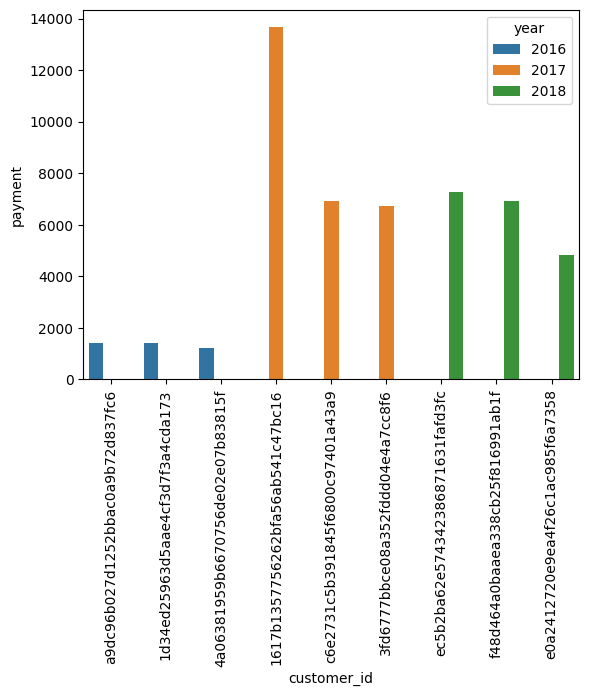

In [33]:
sns.barplot(x='customer_id',y='payment',data=df,hue='year')
plt.xticks(rotation=90)
plt.show()